# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# load dataset

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :4] #use only four  feature
y = cancer.target
feature_names = cancer.feature_names[:4] #use the name of the first four feature
target_names = cancer.target_names
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

# normalize the data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# buid the decision tree

In [5]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [6]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


# evaluate the model performance

In [7]:
print("cassification report:\n", classification_report(y_test,y_pred, zero_division=1))
print("confusion matrixs:\n", confusion_matrix(y_test,y_pred))
print('accuracy score:\n', accuracy_score(y_test,y_pred))

cassification report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.94      0.87      0.91        71

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

confusion matrixs:
 [[39  4]
 [ 9 62]]
accuracy score:
 0.8859649122807017


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.89
Recall: 0.89
F1 Score: 0.89


# plot the decision tree

Text(0.5, 1.0, 'Decision Tree for Breast Cancer Dataset (First Four Features)')

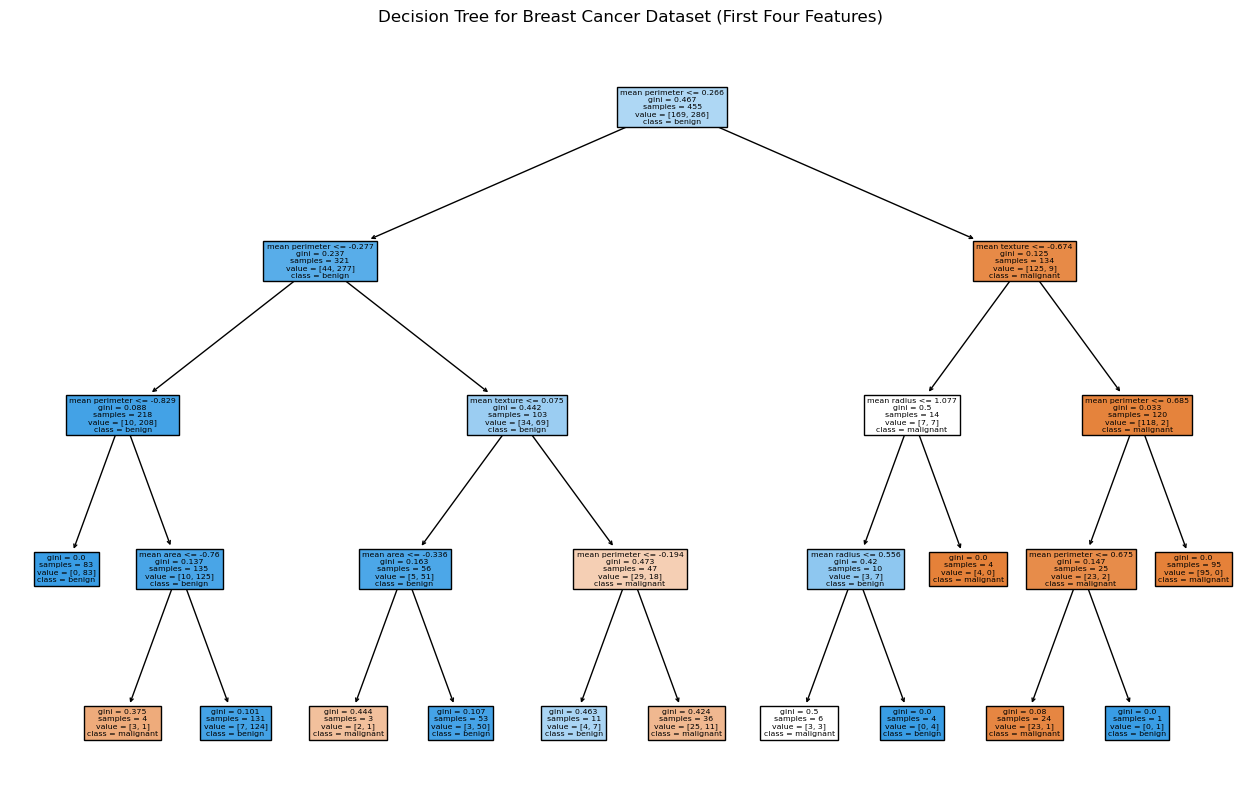

In [27]:
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=feature_names.tolist(), class_names=target_name.tolist(), filled=True)
plt.title('Decision Tree for Breast Cancer Dataset (First Four Features)')

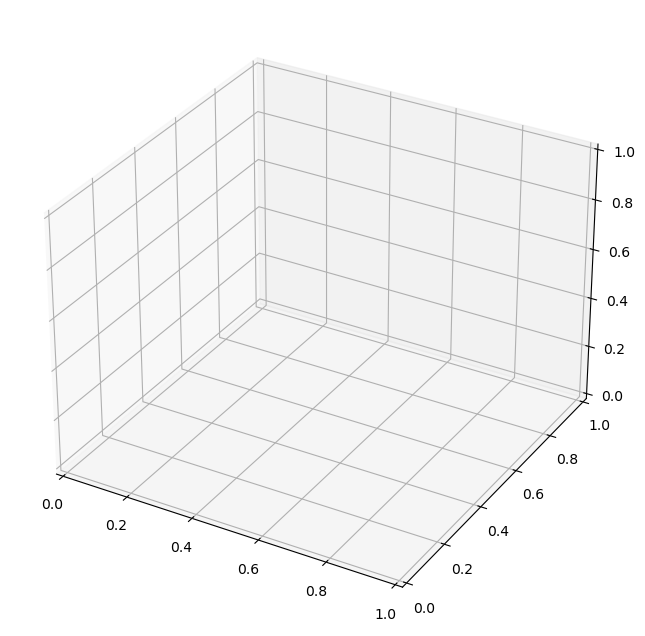

In [33]:
# 3D visualization of decision boundaries (first three feature)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

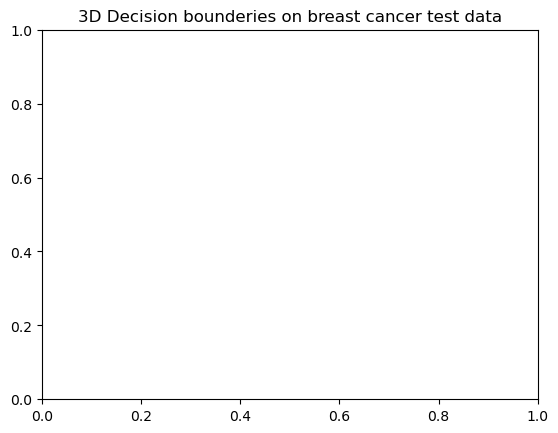

In [34]:
# scatter plot using first three feature
ax.scatter(X_test[:, 0],X_test[:, 1],X_test[:, 2], c=y_pred, cmap='coolwarm', s=60)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.title('3D Decision bounderies on breast cancer test data')
plt.show()

In [10]:
# # predict new data in a loop
# while True:
#     user_input = input('would you like a new record? (y/n):')
#     if user_input.lower() == 'n':
#         print('existing the prediction loop.')
#         break
#     elif user_input.lower() == 'y':
    
#     try: #input feature value from the user
#         new_feature = []
#         for feature in feature_names:
#             while  True:
#                 try:  #insure the input is numeric
#                     value = float(input(f'enter {feature}:'))
#                     new_feature.append(value)
#                     break
#                 except ValueError: 
#                     print(f'invalid input for {feature}. please enter a numeric value')
#         # normalize the user input
#         new_data = scaler.transform([new_feature]) # transform must receive 2d array
#         prediction = model.predict(new_data)
        
#         print(f'predicted class: {target_names[prediction[0]]} (Benign or Malignant)')
#     except Exception as e:

IndentationError: expected an indented block after 'elif' statement on line 7 (364889623.py, line 9)